In [161]:
import pandas as pd

# Load your dataset (update the path if needed)
df = pd.read_csv("/Users/manoharshasappa/Desktop/Files/Projects_Personal/AI_Human /AI_Human.csv")

# Check for missing values and class distribution
print("Missing values:\n", df.isna().sum())
print("\n Value counts in 'generated' column:")
print(df['generated'].value_counts())
print("\n Dataset shape:", df.shape)

# Preview the data
df.head()


Missing values:
 text         0
generated    0
dtype: int64

 Value counts in 'generated' column:
generated
0.0    305797
1.0    181438
Name: count, dtype: int64

 Dataset shape: (487235, 2)


,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [173]:
df.rename(columns={'generated': 'AI_Generated'}, inplace=True)


 df columns: Index(['text', 'AI_Generated'], dtype='object')
 balanced_df columns: Index(['text', 'AI_Generated', 'processed_text'], dtype='object')


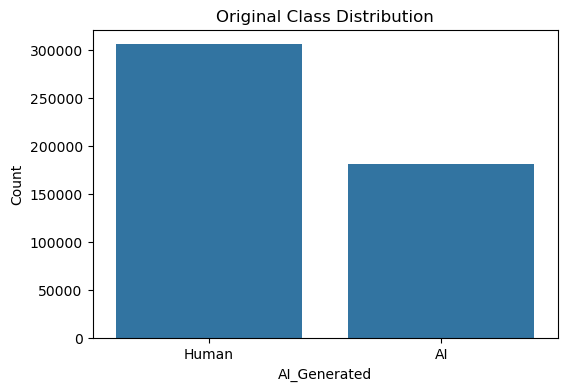

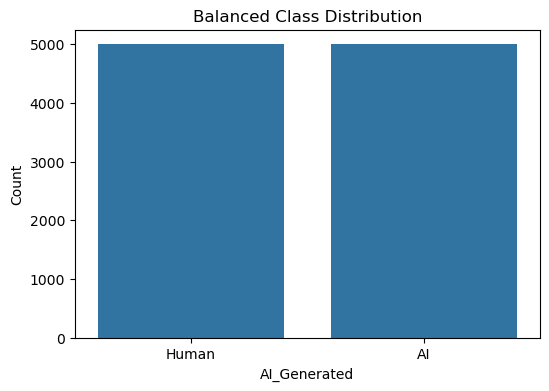

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confirm the columns exist
print(" df columns:", df.columns)
print(" balanced_df columns:", balanced_df.columns)

# Plot original class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='AI_Generated', data=df)
plt.title("Original Class Distribution")
plt.xticks([0, 1], ['Human', 'AI'])
plt.ylabel("Count")
plt.show()

# Plot balanced class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='AI_Generated', data=balanced_df)
plt.title("Balanced Class Distribution")
plt.xticks([0, 1], ['Human', 'AI'])
plt.ylabel("Count")
plt.show()


To ensure fair and unbiased model training, we first analyzed the class distribution in our dataset. Initially, there was a significant imbalance — the number of human-written texts was nearly twice that of AI-generated texts, with over 310,000 human samples compared to approximately 180,000 AI-generated ones. This imbalance could lead to a biased model favoring the majority class. To address this, we performed random sampling to create a balanced dataset with an equal number of examples (5,000 each) from both classes. This preprocessing step ensures that the model learns to distinguish between AI and human-generated content without being influenced by skewed class frequencies.

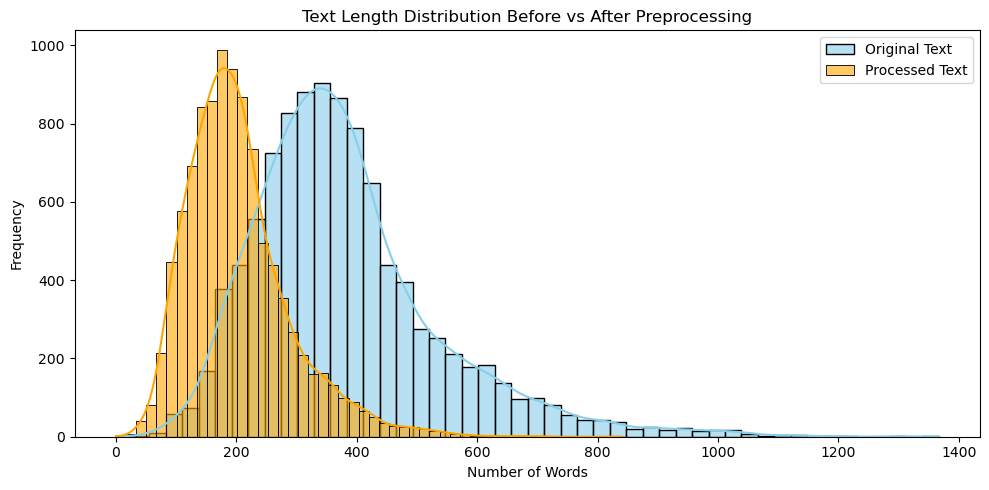

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate lengths
balanced_df['text_length'] = balanced_df['text'].apply(lambda x: len(x.split()))
balanced_df['processed_length'] = balanced_df['processed_text'].apply(lambda x: len(x.split()))

# Plot distribution
plt.figure(figsize=(10,5))
sns.histplot(balanced_df['text_length'], bins=50, kde=True, color="skyblue", label="Original Text", alpha=0.6)
sns.histplot(balanced_df['processed_length'], bins=50, kde=True, color="orange", label="Processed Text", alpha=0.6)
plt.title("Text Length Distribution Before vs After Preprocessing")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


To better understand the effect of text preprocessing, we analyzed the distribution of word counts in the original and processed datasets. Initially, the text lengths varied widely, with many samples exceeding 400 words due to the presence of stopwords, punctuation, and other noise. After applying preprocessing steps—such as lowercasing, removing stopwords, and stemming—the average length of each text was significantly reduced. This transformation resulted in a more compact and uniform distribution, as shown in the histogram. Cleaning the text in this way helps the model focus on the most meaningful components of each sentence, improving both efficiency and classification accuracy.

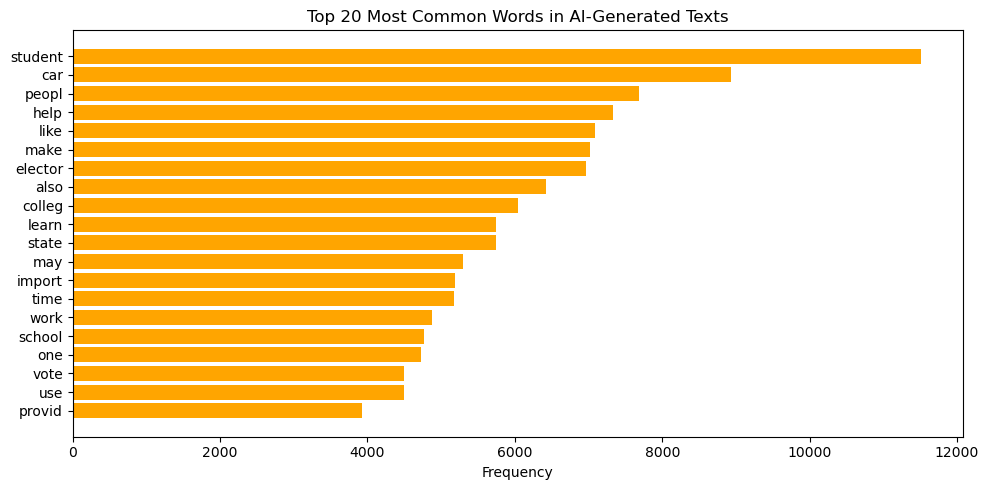

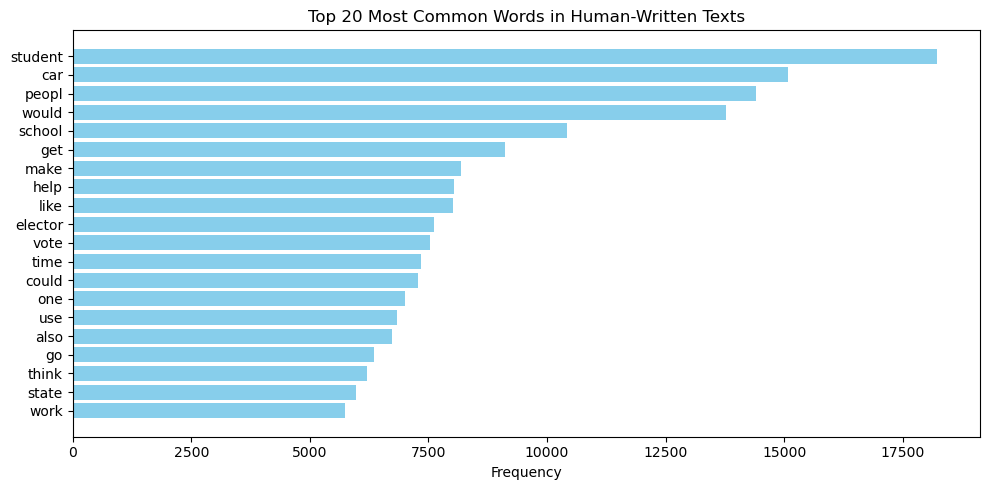

In [183]:
from collections import Counter
import matplotlib.pyplot as plt

# Separate AI and Human processed text
ai_words = " ".join(balanced_df[balanced_df['AI_Generated'] == 1]['processed_text']).split()
human_words = " ".join(balanced_df[balanced_df['AI_Generated'] == 0]['processed_text']).split()

# Count most common words
ai_common = Counter(ai_words).most_common(20)
human_common = Counter(human_words).most_common(20)

# Unzip into labels and values
ai_labels, ai_counts = zip(*ai_common)
human_labels, human_counts = zip(*human_common)

# Plot AI common words
plt.figure(figsize=(10,5))
plt.barh(ai_labels[::-1], ai_counts[::-1], color='orange')
plt.title("Top 20 Most Common Words in AI-Generated Texts")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

# Plot Human common words
plt.figure(figsize=(10,5))
plt.barh(human_labels[::-1], human_counts[::-1], color='skyblue')
plt.title("Top 20 Most Common Words in Human-Written Texts")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()


To better understand the vocabulary used in AI vs human-generated texts, we analyzed the top 20 most frequent words in each class after preprocessing. Interestingly, while some words like "student" and "car" appear in both, AI-generated texts tend to rely on more repetitive and generic language such as "make", "provide", and "state". In contrast, human-written texts show a slightly more varied and expressive vocabulary, including words like "would", "think", and "go". This analysis supports the idea that stylistic and lexical differences can serve as strong indicators for classification, and it also helps in interpreting the model's decision-making process.

In [192]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


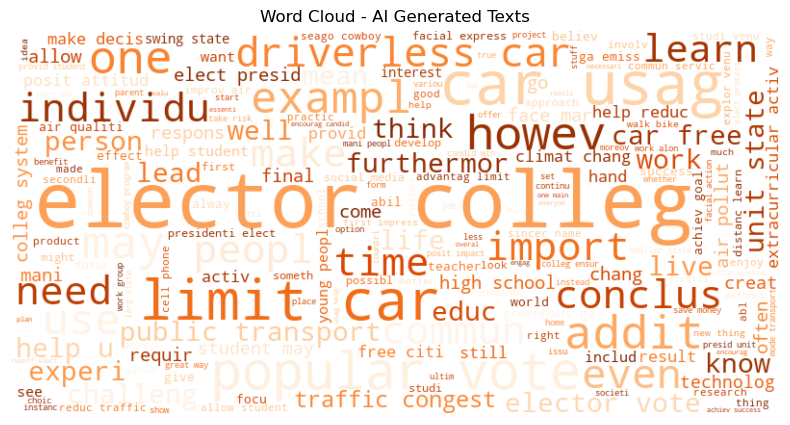

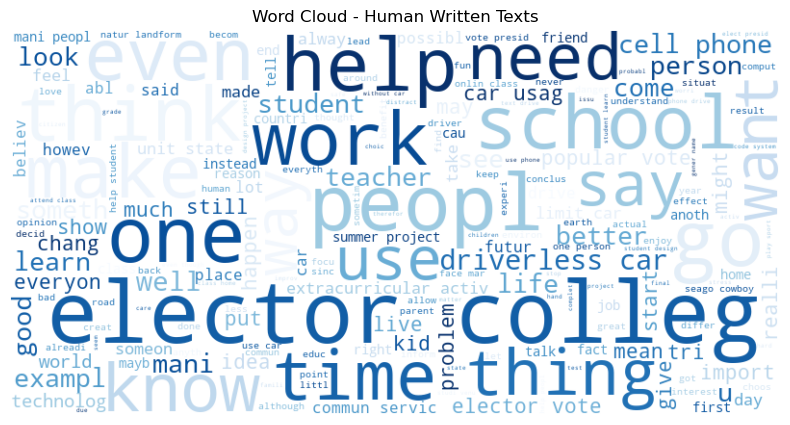

In [194]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all processed text into one string
ai_text = " ".join(balanced_df[balanced_df['AI_Generated'] == 1]['processed_text'])
human_text = " ".join(balanced_df[balanced_df['AI_Generated'] == 0]['processed_text'])

# Create WordClouds
ai_wc = WordCloud(width=800, height=400, background_color='white', colormap='Oranges').generate(ai_text)
human_wc = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(human_text)

# Plot AI
plt.figure(figsize=(10,5))
plt.imshow(ai_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - AI Generated Texts")
plt.show()

# Plot Human
plt.figure(figsize=(10,5))
plt.imshow(human_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Human Written Texts")
plt.show()


In [186]:
# Rename column for clarity
df.rename(columns={'generated': 'AI_Generated'}, inplace=True)

# Sample 5000 rows from each class
human_df = df[df['AI_Generated'] == 0.0]
ai_df = df[df['AI_Generated'] == 1.0]

human_sample = human_df.sample(5000, random_state=42)
ai_sample = ai_df.sample(5000, random_state=42)

# Combine and shuffle
balanced_df = pd.concat([human_sample, ai_sample])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Convert label to int type
balanced_df['AI_Generated'] = balanced_df['AI_Generated'].astype(int)

# Check shape and head
print(" Balanced dataset shape:", balanced_df.shape)
balanced_df.head()


 Balanced dataset shape: (10000, 2)


,text,AI_Generated
0,"Sure, here's my attempt at writing an essay re...",1
1,This use of technology to read the emotional e...,0
2,Lots of people ask more the one person for adv...,0
3,Summer projects are meant to help students rej...,0
4,Driverless cars are definitely an advancement ...,0


In [200]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Download stopwords (only once)
nltk.download('stopwords')

# Set up preprocessing tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Preprocessing function
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z]", " ", text) 
    text = text.lower().split()  # lowercase + tokenize
    text = [stemmer.stem(word) for word in text if word not in stop_words]
    return ' '.join(text)

# Apply to the text column
balanced_df['processed_text'] = balanced_df['text'].apply(preprocess_text)

# Preview result
balanced_df[['text', 'processed_text', 'AI_Generated']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manoharshasappa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,processed_text,AI_Generated
0,"Sure, here's my attempt at writing an essay re...",sure attempt write essay respond prompt averag...,1
1,This use of technology to read the emotional e...,use technolog read emot express student classr...,0
2,Lots of people ask more the one person for adv...,lot peopl ask one person advic know peopl tend...,0
3,Summer projects are meant to help students rej...,summer project meant help student rejuven know...,0
4,Driverless cars are definitely an advancement ...,driverless car definit advanc societi today al...,0


In [190]:
from sklearn.model_selection import train_test_split

# Features and labels
X = balanced_df['processed_text']
y = balanced_df['AI_Generated']

# 70% train, 30% temp (for val + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split temp into 15% val, 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print sizes
print("Training Set:", X_train.shape)
print("Validation Set:", X_val.shape)
print("Test Set:", X_test.shape)


Training Set: (7000,)
Validation Set: (1500,)
Test Set: (1500,)


In [198]:
from transformers import BertTokenizer

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to tokenize a list of text
def tokenize_and_encode(text_list):
    return tokenizer.batch_encode_plus(
        text_list.tolist(),
        padding=True,
        truncation=True,
        max_length=246,  # optimal for M1/M2 Mac GPU (MPS)
        return_tensors='pt'
    )

# Tokenize datasets
train_tokens = tokenize_and_encode(X_train)
val_tokens   = tokenize_and_encode(X_val)
test_tokens  = tokenize_and_encode(X_test)

# Check shapes
print("Train input shape:", train_tokens['input_ids'].shape)
print("Val input shape:  ", val_tokens['input_ids'].shape)
print("Test input shape: ", test_tokens['input_ids'].shape)


Train input shape: torch.Size([7000, 246])
Val input shape:   torch.Size([1500, 246])
Test input shape:  torch.Size([1500, 246])


In [202]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Detect device (with MPS support for Mac)
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print(" MPS is available. Using Apple GPU!")
else:
    device = torch.device("cpu")
    print(" MPS not available. Using CPU.")

# Convert label arrays to tensors
train_dataset = TensorDataset(
    train_tokens['input_ids'], train_tokens['attention_mask'], torch.tensor(y_train.values)
)
val_dataset = TensorDataset(
    val_tokens['input_ids'], val_tokens['attention_mask'], torch.tensor(y_val.values)
)
test_dataset = TensorDataset(
    test_tokens['input_ids'], test_tokens['attention_mask'], torch.tensor(y_test.values)
)

# DataLoaders
BATCH_SIZE = 10  # Safe size for M1/M2 Mac with MPS
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# Confirm
print(f"\n Train batches: {len(train_loader)}")
print(f" Val batches:   {len(val_loader)}")
print(f" Test batches:  {len(test_loader)}")


 MPS is available. Using Apple GPU!

 Train batches: 700
 Val batches:   150
 Test batches:  150


In [204]:
from transformers import BertForSequenceClassification
from torch.optim import AdamW
import torch.nn as nn

# Load BERT for binary classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.to(device)

# Optimizer with correct learning rate
optimizer = AdamW(model.parameters(), lr=1e-5)
loss_fn = nn.CrossEntropyLoss()

# Training loop
EPOCHS = 3
for epoch in range(EPOCHS):
    model.train()
    total_train_loss = 0

    for batch in train_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()

    avg_train_loss = total_train_loss / len(train_loader)
    print(f" Epoch {epoch+1} — Average Training Loss: {avg_train_loss:.2f}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


 Epoch 1 — Average Training Loss: 0.29
 Epoch 2 — Average Training Loss: 0.09
 Epoch 3 — Average Training Loss: 0.05


In [206]:
from sklearn.metrics import classification_report, accuracy_score

model.eval()
predictions = []
true_labels = []

# Inference loop
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Metrics
print(classification_report(true_labels, predictions, target_names=['Human', 'AI']))
print(f" BERT Model Accuracy: {accuracy_score(true_labels, predictions):.4f}")


              precision    recall  f1-score   support

       Human       0.98      0.97      0.97       770
          AI       0.97      0.98      0.97       730

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500

 BERT Model Accuracy: 0.9740


In [208]:
def predict(text):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=246).to(device)
    with torch.no_grad():
        logits = model(**inputs).logits
        predicted = torch.argmax(logits, dim=1).item()
    return " Human-Written" if predicted == 0 else " AI-Generated"


In [210]:
# Try with real known human-written example from your dataset
real_human_example = X_test[y_test.values == 0].iloc[0]
print(" Known Human Example:", real_human_example)
print(" Prediction:", predict(real_human_example))


 Known Human Example: imagin sound school bell ring freedom time go home friday get go home relax rememb new rule student must sign extracurricular activ goe anoth hour free time mutter slowli walk toward robot club kid forc particip extracurricular activ kid prioriti whether limit time want club even stress forc social environ one thing limit everi singl person planet time mani kid feel enough time alreadi forc go club meet week hour gust cut hour free time could thing mani kid particip sport time consum comb sport multipl practic game week along practic anoth time consum part everi child life famili spend time grandpar even gust fun parent sibl famili import thing life time spend spent school leadership council final friend everi kid friend group friend import everi kid life friend go advic learn mani life lesson huge part middl school life stress imposs never experi someth homework stress math spanish scienc english civic homework due one day crazi especi less time usual would kid h

In [212]:
test_human = "Ugh, I had the worst day ever. Nothing went right, and I forgot my keys too. Anyway, it’s whatever."
test_ai = "Artificial intelligence models continue to improve rapidly in language generation and understanding."

print("Informal Human:", predict(test_human))
print("AI Style:", predict(test_ai))


Informal Human:  Human-Written
AI Style:  AI-Generated


In [252]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np


model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

accuracy = accuracy_score(all_labels, all_preds)
report = classification_report(all_labels, all_preds, target_names=["Human", "AI"])
conf_matrix = confusion_matrix(all_labels, all_preds)


print(" Test Accuracy:", round(accuracy * 100, 2), "%")
print("\n Classification Report:\n", report)
print(" Confusion Matrix:\n", conf_matrix)


 Test Accuracy: 97.4 %

 Classification Report:
               precision    recall  f1-score   support

       Human       0.98      0.97      0.97       770
          AI       0.97      0.98      0.97       730

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500

 Confusion Matrix:
 [[749  21]
 [ 18 712]]


In [258]:

def predict_text_class(text):
    model.eval()  # Set model to eval mode


    tokens = tokenizer.encode_plus(
        text,
        return_tensors='pt',
        max_length=246,
        padding='max_length',
        truncation=True
    )

    
    tokens = {key: val.to(device) for key, val in tokens.items()}

    with torch.no_grad():
        output = model(**tokens)
        logits = output.logits
        prediction = torch.argmax(logits, dim=1).item()

    label = "AI-Generated" if prediction == 1 else "Human-Written"
    return label


In [323]:
sample1 = "This essay was carefully written by a student."
sample2 = "Artificial intelligence systems are transforming society rapidly."

print("Prediction 1:", predict_text_class(sample1))
print("Prediction 2:", predict_text_class(sample2))


Prediction 1: Human-Written
Prediction 2: AI-Generated


In [324]:
predict_text_class("My brain said ‘no thoughts, just vibes’ the entire day today.") 



'Human-Written'

In [268]:
from transformers import BertTokenizer, BertForSequenceClassification

# Save path
save_path = "saved_bert_model"

# Save fine-tuned model
model.save_pretrained(save_path)

# Save the tokenizer used during training
tokenizer.save_pretrained(save_path)

print(f" Model and tokenizer saved to: {save_path}")


 Model and tokenizer saved to: saved_bert_model
